# Salary Predictions Based on Job Descriptions

### Problem : Examine job postings with salaries in the past and predict salaries for new set of job postings

In [119]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from statistics import *

# my info 
__author__ = "Aesha Chauhan"
__email__ = "aesha.c30@gmail.com"

### Load the data 

#### Load the data into a Pandas dataframe and get an overview of the data

In [120]:
train_features_df = pd.read_csv('/Users/aesha/Desktop/DSDJ/Salary-Prediction/data/train_features.csv')
test_features_df = pd.read_csv('/Users/aesha/Desktop/DSDJ/Salary-Prediction/data/test_features.csv')
train_target_df = pd.read_csv('/Users/aesha/Desktop/DSDJ/Salary-Prediction/data/train_Salaries.csv')

In [121]:
train_features_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [122]:
test_features_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [123]:
train_target_df.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [124]:
train_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [125]:
test_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [126]:
train_target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   jobId   1000000 non-null  object
 1   salary  1000000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [127]:
mean(train_target_df.salary)

116.061818

In [128]:
stdev(train_target_df.salary)

38.71793638113314

In [129]:
median(train_target_df.salary)

114.0

In [130]:
variance(train_target_df.salary)

1499.0785976134737

In [131]:
min(train_target_df.salary)

0

In [132]:
max(train_target_df.salary)

301

### Clean the data

#### Look for duplicate, invalid, or corrupt data and remove it

In [133]:
train_features_df.duplicated().sum()

0

In [134]:
train_target_df.duplicated().sum()

0

In [135]:
test_features_df.duplicated().sum()

0

In [136]:
invalid_data=train_target_df[train_target_df.salary <=0]
invalid_data

,jobId,salary
30559,JOB1362684438246,0
495984,JOB1362684903671,0
652076,JOB1362685059763,0
816129,JOB1362685223816,0
828156,JOB1362685235843,0


In [137]:
# remove invalid data since we know theese are not volunteer position and can conclude this is corrupt data
train_target_df=train_target_df.drop(train_target_df.index[[30559,495984,652076,816129,828156]])
train_target_df

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163
...,...,...
999995,JOB1362685407682,88
999996,JOB1362685407683,160
999997,JOB1362685407684,64
999998,JOB1362685407685,149


In [138]:
min(train_target_df.salary)

17

#### Merge features and target into single df

In [139]:
# merge features and salaries on jobId
train_df = pd.merge(train_features_df,train_target_df,on='jobId')
train_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [140]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999995 entries, 0 to 999994
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   jobId                999995 non-null  object
 1   companyId            999995 non-null  object
 2   jobType              999995 non-null  object
 3   degree               999995 non-null  object
 4   major                999995 non-null  object
 5   industry             999995 non-null  object
 6   yearsExperience      999995 non-null  int64 
 7   milesFromMetropolis  999995 non-null  int64 
 8   salary               999995 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


#### Identify outliers using IQR rule

In [141]:
stat = train_df.salary.describe()
print(stat)

count    999995.000000
mean        116.062398
std          38.717163
min          17.000000
25%          88.000000
50%         114.000000
75%         141.000000
max         301.000000
Name: salary, dtype: float64


In [142]:
IQR = stat['75%']-stat['25%']
upper = stat['75%'] + 1.5 * IQR
lower = stat['25%'] - 1.5 * IQR
print("the upper and lower bounds for suspected outliers are {} and {}.".format(upper,lower))

the upper and lower bounds for suspected outliers are 220.5 and 8.5.


#### Examine potential outliers

In [143]:
# check potential outlier below lower bound
train_df[train_df.salary<8.5].count()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

In [144]:
train_df.loc[train_df.salary>220.5,'jobType'].value_counts()

CEO               3227
CFO               1496
CTO               1488
VICE_PRESIDENT     603
MANAGER            217
SENIOR              66
JUNIOR              20
Name: jobType, dtype: int64

In [145]:
# check most suspicious potential outliers above upper bound
train_df[(train_df.salary>220.5)&(train_df.jobType=='JUNIOR')]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31354,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100041,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160332,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
189581,JOB1362684597269,COMP32,JUNIOR,DOCTORAL,BUSINESS,OIL,24,11,221
214605,JOB1362684622293,COMP47,JUNIOR,MASTERS,BUSINESS,FINANCE,22,4,222
303777,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348353,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
427592,JOB1362684835280,COMP54,JUNIOR,DOCTORAL,ENGINEERING,FINANCE,23,3,221


#### Most outliers are in the CEO, CFO, CTO catergories and these positions are highly paid. For the junior roles, ouliers's industries are well known for highly paid jobs hence we will keep the outliers as they look legitimate

### Explore the data (EDA) 

#### Identify numerical and categorical columns

In [146]:
train_features_df.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis'],
      dtype='object')

In [147]:
numeric_cols = ['yearsExperience','milesFromMetropolis']
categorical_cols = ['jobId','companyId','jobType','degree','major','industry']

#### Summarize numerical and categorical columns separately

In [148]:
train_features_df.describe(include=[np.number])

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,11.992386,49.529260
std,7.212391,28.877733
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [149]:
train_features_df.describe(include=['O'])

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362685015625,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


In [150]:
train_df.describe(include=[np.number])

,yearsExperience,milesFromMetropolis,salary
count,999995.000000,999995.000000,999995.000000
mean,11.992407,49.529381,116.062398
std,7.212390,28.877721,38.717163
min,0.000000,0.000000,17.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [151]:
train_df.describe(include=['O'])

,jobId,companyId,jobType,degree,major,industry
count,999995,999995,999995,999995,999995,999995
unique,999995,63,8,5,9,7
top,JOB1362685015625,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236975,532353,143205


#### Visualize target variable (salary)

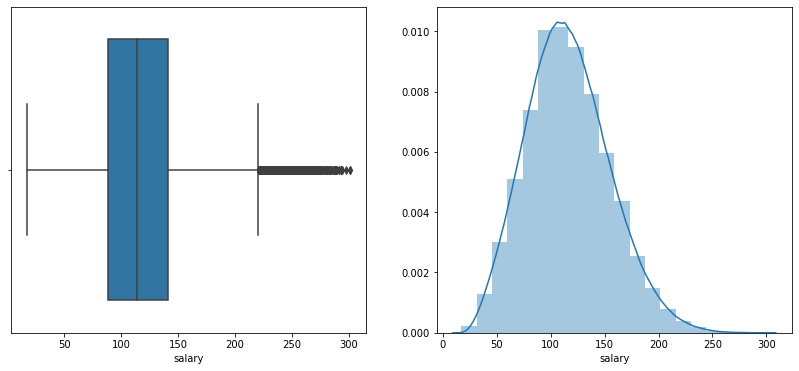

In [152]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(train_df.salary)
plt.subplot(1,2,2)
sns.distplot(train_df.salary,bins=20)

In [153]:
def plot_feature(df,col):
    plt.figure(figsize=(14,6))
    plt.subplot(1,2,1)
    if df[col].dtype == 'int64':
        df[col].value_counts().sort_index().plot()
    else:
        #change the categorical variable to category type and order their level by the mean salary
        # in each category 
        mean=df.groupby(col)['salary'].mean()
        df[col]= df[col].astype('category')
        levels = mean.sort_values().index.tolist()
        df[col].cat.reorder_categories(levels,inplace=True)
        df[col].value_counts().plot()
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.subplot(1,2,2)
    
    if df[col].dtype == 'int64'or col == 'companyId':
        #plot the mean salary for each category and fill between the (mean-std,mean+std)
        mean = df.groupby(col)['salary'].mean()
        std= df.groupby(col)['salary'].std()
        mean.plot()
        plt.fill_between(range(len(std.index)),mean.values-std.values,mean.values+std.values,alpha=0.1)
        
    else:
        sns.boxplot(x=col,y='salary',data=df)
        plt.xticks(rotation=45)
        plt.ylabel('Salaries')
        plt.show
    

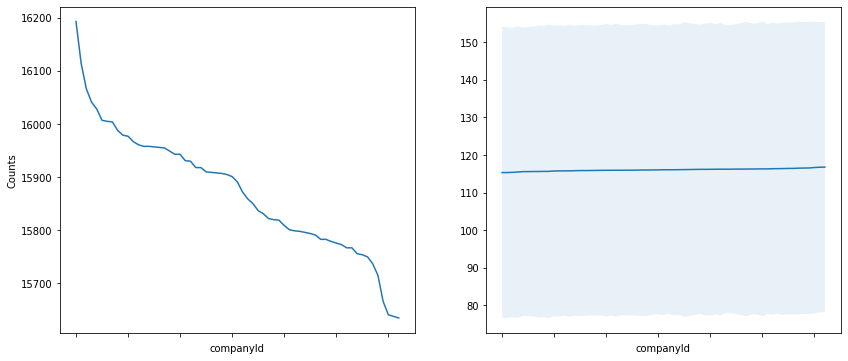

In [154]:
plot_feature(train_df,'companyId')

#### The salary is weakly associated with companies

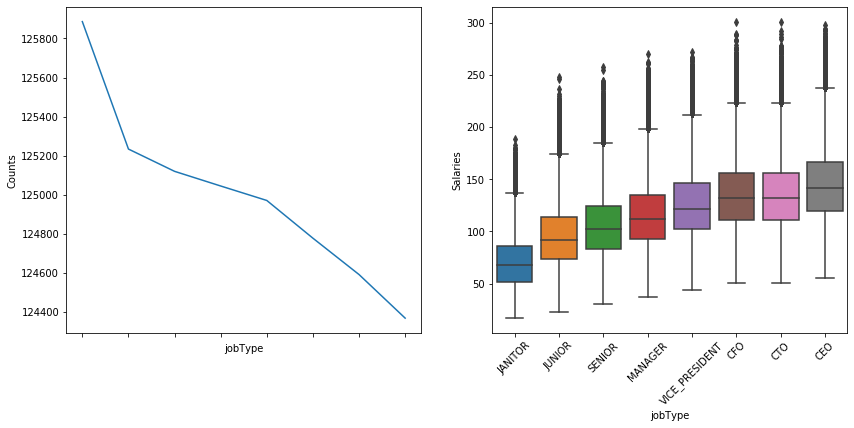

In [155]:
plot_feature(train_df,'jobType')

#### There is a clear positive correlation between job type and salary

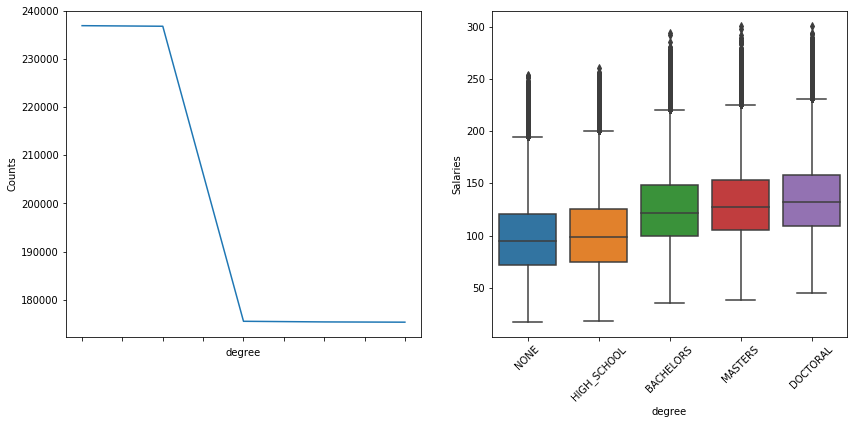

In [156]:
plot_feature(train_df,'degree')

#### More advanced degrees tend to correspond to higher salaries

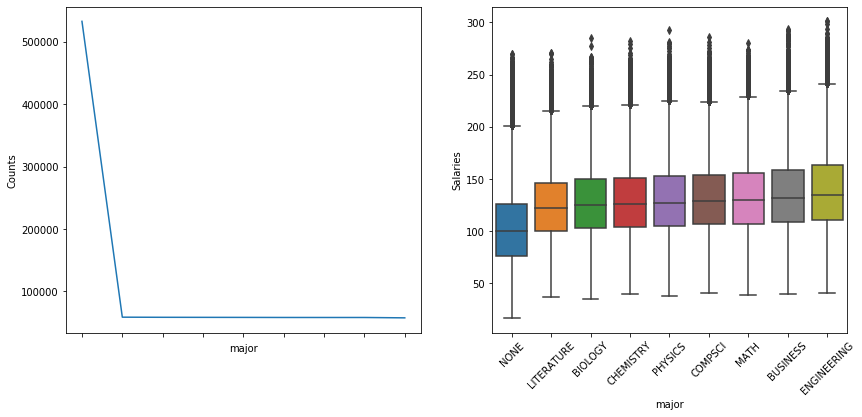

In [157]:
plot_feature(train_df,'major')

#### People with majors of Engineering, Business and Math are paid higher

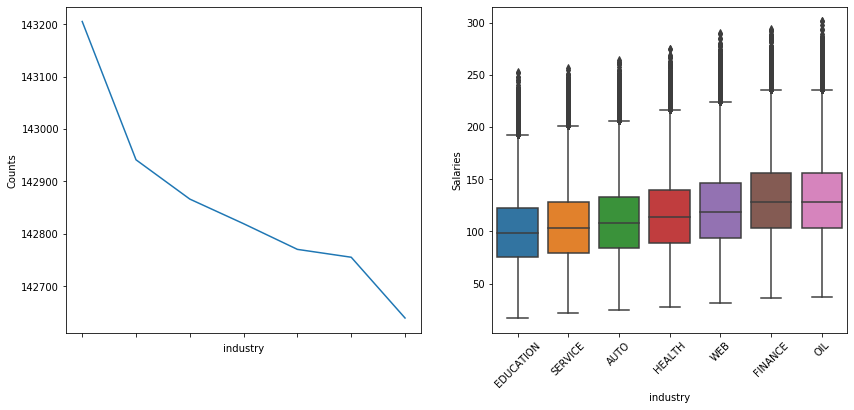

In [158]:
plot_feature(train_df,'industry')

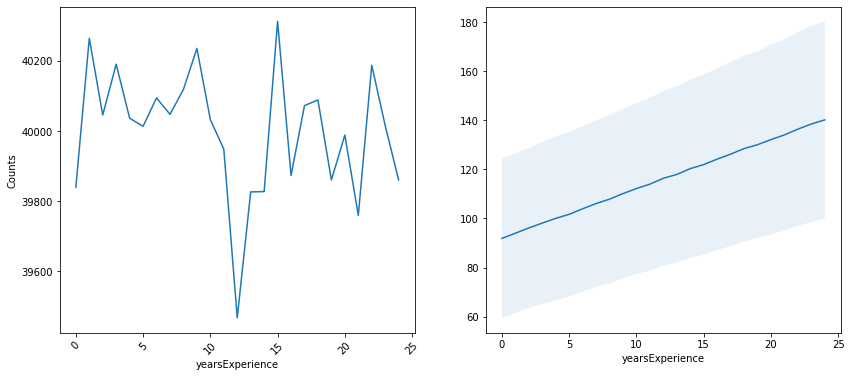

In [159]:
plot_feature(train_df,'yearsExperience')

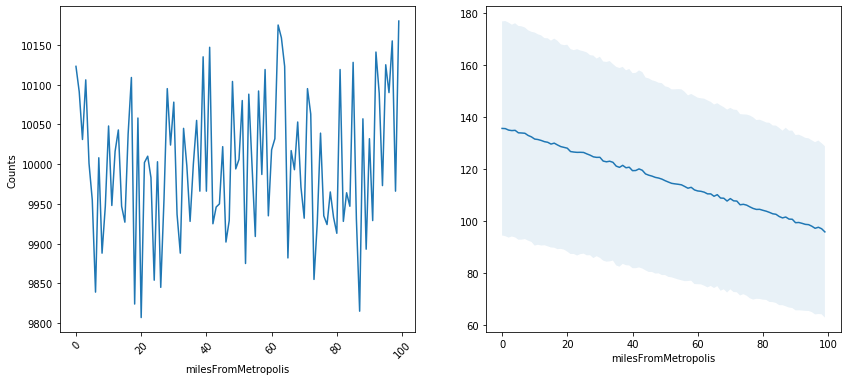

In [160]:
plot_feature(train_df,'milesFromMetropolis')

In [161]:
train_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [162]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999995 entries, 0 to 999994
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   jobId                999995 non-null  object  
 1   companyId            999995 non-null  category
 2   jobType              999995 non-null  category
 3   degree               999995 non-null  category
 4   major                999995 non-null  category
 5   industry             999995 non-null  category
 6   yearsExperience      999995 non-null  int64   
 7   milesFromMetropolis  999995 non-null  int64   
 8   salary               999995 non-null  int64   
dtypes: category(5), int64(3), object(1)
memory usage: 82.9+ MB


In [170]:
train_df[train_df.columns[0:]].corr()['salary'][:]

companyId              0.006793
jobType                0.597456
degree                 0.401244
major                  0.378646
industry               0.296618
yearsExperience        0.375013
milesFromMetropolis   -0.297686
salary                 1.000000
Name: salary, dtype: float64

In [ ]:
plot.scatter(xData, yData)

In [163]:
def encode_label(df,col):
    # encode the categories using average salary for each cateegory to replace label
    cat_dict={}
    cats= df[col].cat.categories.tolist()
    for cat in cats:
        cat_dict[cat]=train_df[train_df[col]==cat]['salary'].mean()
    df[col]=df[col].map(cat_dict)

In [164]:
for col in train_df.columns:
    if train_df[col].dtype.name == 'category':
        encode_label(train_df,col)

In [165]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999995 entries, 0 to 999994
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   jobId                999995 non-null  object  
 1   companyId            999995 non-null  category
 2   jobType              999995 non-null  category
 3   degree               999995 non-null  category
 4   major                999995 non-null  category
 5   industry             999995 non-null  category
 6   yearsExperience      999995 non-null  int64   
 7   milesFromMetropolis  999995 non-null  int64   
 8   salary               999995 non-null  int64   
dtypes: category(5), int64(3), object(1)
memory usage: 82.9+ MB


In [166]:
train_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,115.345049,135.458547,130.505647,133.322042,115.735540,10,83,130
1,JOB1362684407688,115.756548,145.311425,101.921085,102.583864,121.645362,3,73,101
2,JOB1362684407689,116.224249,125.368630,135.490979,130.372436,115.735540,10,38,137
3,JOB1362684407690,116.199380,115.368518,135.490979,129.072085,109.435222,8,17,142
4,JOB1362684407691,115.888501,125.368630,125.454663,130.372436,130.747659,8,16,163


<function matplotlib.pyplot.show(*args, **kw)>

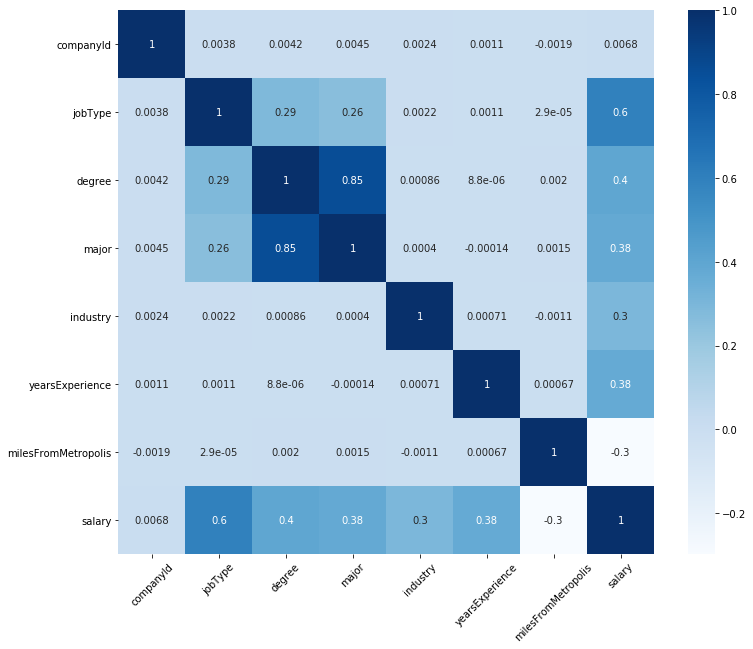

In [168]:
# correlation between features and response
# jobId removed since it is unique for all
for col in train_df.columns:
    if train_df[col].dtype.name == 'category':
        train_df[col] = train_df[col].astype('int64')
fig = plt.figure(figsize=(12,10))
features = ['companyId','jobType','degree','major','industry','yearsExperience','milesFromMetropolis']
sns.heatmap(train_df[features+['salary']].corr(),cmap='Blues',annot=True)
plt.xticks(rotation=45)
plt.show

In [169]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999995 entries, 0 to 999994
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   jobId                999995 non-null  object
 1   companyId            999995 non-null  int64 
 2   jobType              999995 non-null  int64 
 3   degree               999995 non-null  int64 
 4   major                999995 non-null  int64 
 5   industry             999995 non-null  int64 
 6   yearsExperience      999995 non-null  int64 
 7   milesFromMetropolis  999995 non-null  int64 
 8   salary               999995 non-null  int64 
dtypes: int64(8), object(1)
memory usage: 116.3+ MB
